## Determinación de $f_p$ para los filtros
### Análisis de la señal $x_3$
$x_3(t)=V_{max}\cdot e^{-|t|}$ definida para t entre -5 y 5s, periódica. T=10s.


In [2]:
import scipy.signal as ss
import matplotlib.pyplot as plt
import numpy as np
import math 
import cmath

Escribiendo a $x_3(t)$ mediante la serie exponencial de Fourier:
$$x(t)\approx \sum_{k \in Z}^{}X_k.e^{ik\omega_0t}$$
$$X_k = \frac{1}{T} \int_{t_0}^{t_0+T}x_3(t).e^{-ik\omega_0t}dt, \forall k \in Z$$

Utilizando la expresión anterior, se obtiene que:
$$X_k = \frac{V_{max}}{10}[\frac{1}{1-ik\omega_0}(1-e^{-5(1-ik\omega_0)})-\frac{1}{1+ik\omega_0}(e^{-5(1+ik\omega_0)}-1)]$$
Reemplazando $\omega_0 = \frac{2\pi}{10}$
$$ X_k = \frac{V_{max}}{5}\cdot \frac{1-e^{-5}\cdot(-1)^k}{1+\left(\frac{2\pi k}{10}\right)^2}$$
Al ser una funcion par y real se pueden obtener los coeficientes de la serie trigonometrica siendo $a_k = 2\cdot X_k$ ya que $X_k = X_{-k}, \forall k \in Z$ 

In [31]:
from sympy import integrate, N, factor
from sympy.abc import k, t,n

Vmax = 5
T = 10
w0 = (2 * math.pi) / T 
Xk = (Vmax / 5) * ((1-math.e**(-5)*(-1)**k)/(1+(2*math.pi*k/10)**2))

fun = Vmax*math.e**-t
P = 1/5 * integrate(fun**2,(t, 0, 5))

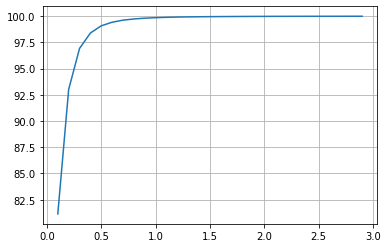

In [29]:
from sympy.abc import n
a_0 = 2*Vmax/5*(1-math.e**(-5))
a_n = 2*Vmax/5*(1-math.e**(-5)*(-1)**n)/(1+(math.pi*n/5)**2)
P_k = []
freq_k = []
for k in range(1,30):
    freq_k.append(N(k*1/10,5))
    P_k.append(N((a_0**2)/4, 5))
    for _n in range(1,k+1):
        P_k[k-1] += N(((a_n.subs(n,_n))**2)/2,5)
    P_k[k-1] = N(factor(P_k[k-1]/P*100), 5)
plt.plot(freq_k, P_k)
plt.grid(True)